In [1]:
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
rdBase.rdkitVersion

'2020.03.1b1'

In [3]:
from rdkit.Chem.Scaffolds import rdScaffoldNetwork

In [4]:
smiles_lsit = [
    "CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5",
    "CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=O)CC#N"
]

In [5]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles_lsit]

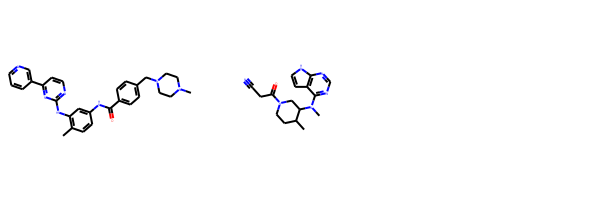

In [6]:
Draw.MolsToGridImage(mols)

In [7]:
params = rdScaffoldNetwork.ScaffoldNetworkParams()

In [8]:
netwks = rdScaffoldNetwork.CreateScaffoldNetwork([mols[1]], params)

In [9]:
import networkx as nx

In [10]:
g = nx.graph.Graph()

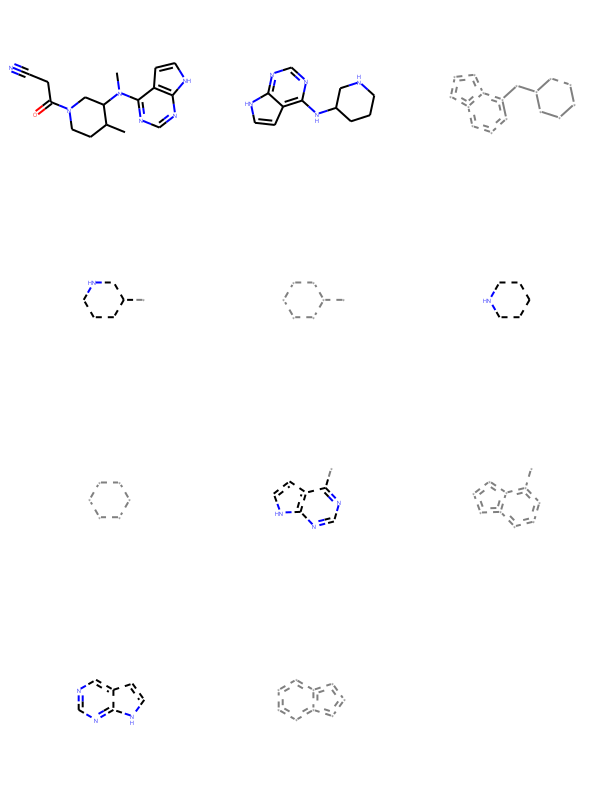

In [11]:
rdk_nodes = [Chem.MolFromSmiles(sma) for sma in netwks.nodes]
Draw.MolsToGridImage(rdk_nodes)

In [12]:
g.add_nodes_from(list(range(len(rdk_nodes))),mol=rdk_nodes, smiles=list(netwks.nodes), hac=[mol.GetNumAtoms() for mol in rdk_nodes])

In [13]:
g.number_of_nodes()
#len(rdk_nodes)

11

In [14]:
g.add_edges_from([(e.beginIdx,e.endIdx) for e in netwks.edges])

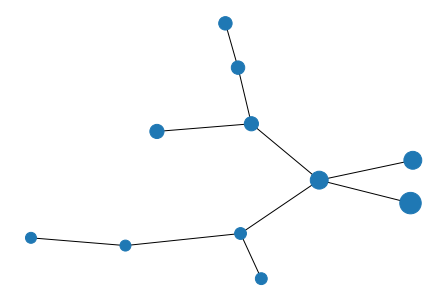

In [15]:
nx.draw(g, label=list(netwks.nodes), node_size=[mol.GetNumAtoms()*20 for mol in rdk_nodes])

In [16]:
mol = rdk_nodes[1]

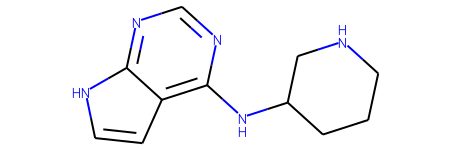

In [17]:
mol

In [18]:
mol.GetNumAtoms()

16